<a href="https://colab.research.google.com/github/smruti0301/data-science-exp/blob/main/exp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EMBEDDED FEATURE SELECTION

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Apply Lasso (L1 Regularization) for Feature Selection
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)  # Lasso (L1 regularization)
lasso.fit(X_train, y_train)

# Sum absolute coefficients across classes and identify non-zero feature indices
lasso_coef_abs_sum = np.sum(np.abs(lasso.coef_), axis=0)
lasso_selected_features = np.where(lasso_coef_abs_sum > 0)[0]

# Print selected features
selected_feature_names = [iris.feature_names[i] for i in lasso_selected_features]
print("Selected Features using Lasso (L1 Regularization):", selected_feature_names)

Selected Features using Lasso (L1 Regularization): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Selected Features using Random Forest: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']


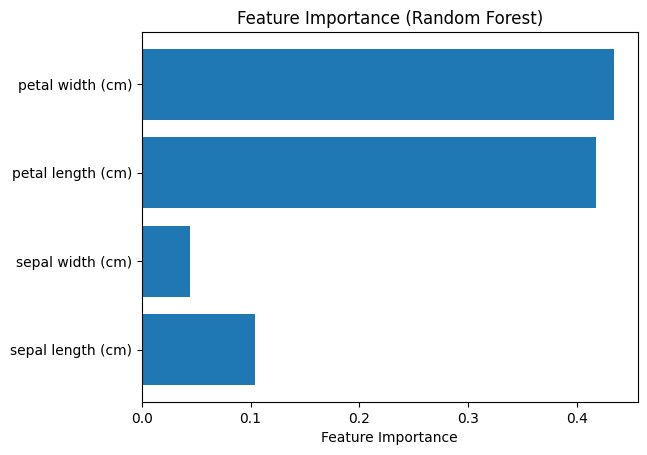

In [ ]:
# Apply Random Forest for Feature Selection (Tree-based method)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
importance = rf.feature_importances_

# Select features with importance greater than a threshold (e.g., 0.1)
threshold = 0.1
rf_selected_features = np.where(importance > threshold)[0]

# Get the names of the selected features
selected_feature_names = [iris.feature_names[i] for i in rf_selected_features]

# Print selected features
print("Selected Features using Random Forest:", selected_feature_names)

# Visualize feature importances
plt.barh(iris.feature_names, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

Selected Features using RFECV: ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


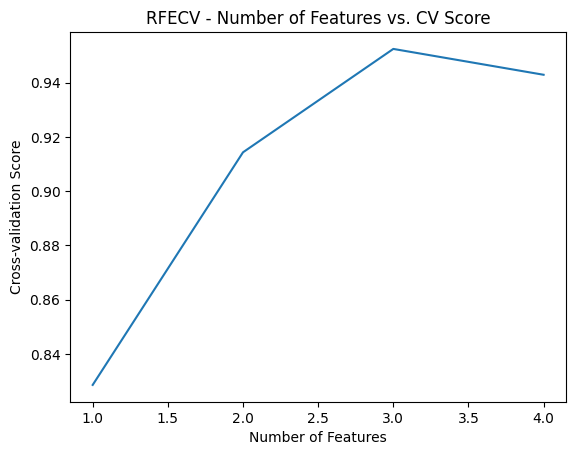

In [ ]:
# Apply Recursive Feature Elimination with Cross-Validation (RFECV)
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200, solver='liblinear')

# Initialize RFECV (automatically selects the best number of features based on cross-validation)
rfecv = RFECV(estimator=log_reg, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Get the selected feature indices
rfecv_selected_features = np.where(rfecv.support_)[0]

# Get the names of the selected features
selected_feature_names = [iris.feature_names[i] for i in rfecv_selected_features]

# Print the selected features
print("Selected Features using RFECV:", selected_feature_names)

# Plot the number of features vs. cross-validation scores
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel('Number of Features')
plt.ylabel('Cross-validation Score')
plt.title('RFECV - Number of Features vs. CV Score')
plt.show()


Selected Features using SelectFromModel: ['petal length (cm)', 'petal width (cm)']


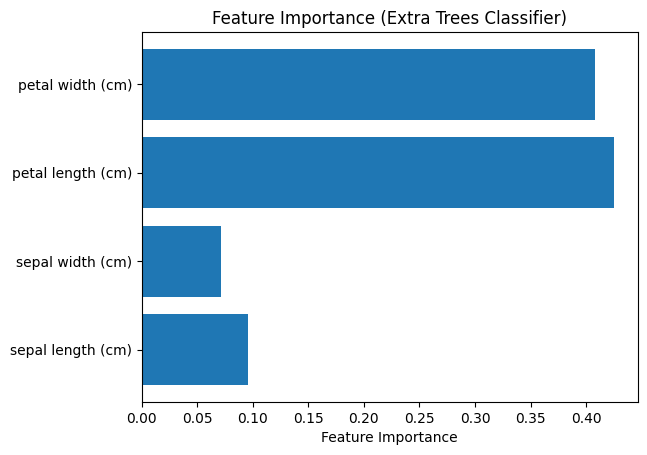

In [ ]:
# Apply SelectFromModel using Extra Trees Classifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees Classifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X_train, y_train)

# Use SelectFromModel to select features based on importance
selector = SelectFromModel(etc, threshold="mean", prefit=True)
select_from_model_selected_features = np.where(selector.get_support())[0]

# Get the names of the selected features
selected_feature_names = [iris.feature_names[i] for i in select_from_model_selected_features]

# Print selected features
print("Selected Features using SelectFromModel:", selected_feature_names)

# Visualize feature importances
importances = etc.feature_importances_
plt.barh(iris.feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Extra Trees Classifier)')
plt.show()
